In [1]:
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

In [4]:
df_hsc = pd.read_csv('../data/external/cosmos_object.csv.gz')
df_hsc

,# object_id,ra,dec,g_cmodel_flux,g_cmodel_fluxsigma,r_cmodel_flux,r_cmodel_fluxsigma,i_cmodel_flux,i_cmodel_fluxsigma,z_cmodel_flux,...,i_extendedness_value,a_g,a_r,a_i,a_z,a_y,i_cmodel_mag,i_kronflux_radius,isprimary,parent_id
0,43153636661924500,149.456866,1.678297,795.643250,33.179199,1150.575810,55.651554,928.351868,32.377098,2229.232420,...,1.0,0.063451,0.044572,0.031980,0.024734,0.021052,23.980719,2.991691,True,0
1,43153636661922352,149.462539,1.631312,3026.896480,34.693684,8828.392580,40.670975,16967.310500,47.327927,22243.584000,...,1.0,0.060549,0.042534,0.030517,0.023603,0.020090,20.825968,0.961701,True,0
2,43153636661925121,149.467711,1.691311,154.460342,27.654905,325.814117,42.807510,391.285889,30.395908,433.255676,...,1.0,0.063958,0.044928,0.032235,0.024932,0.021221,24.918764,0.880272,True,0
3,43153636661922977,149.498639,1.644790,380.336761,18.120678,428.260315,22.094637,499.398895,21.109989,946.957397,...,1.0,0.061635,0.043297,0.031065,0.024026,0.020450,24.653881,1.738999,True,0
4,43153636661923870,149.464695,1.665076,458.931458,22.813761,802.907166,28.623981,937.572937,22.021936,1082.289790,...,1.0,0.062310,0.043771,0.031405,0.024289,0.020674,23.969986,0.861955,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79187,43158472795101783,150.519247,2.795248,817.981567,40.949341,680.922180,31.114925,1115.950680,25.891771,2054.364990,...,1.0,0.066147,0.046466,0.033339,0.025785,0.021947,23.780888,0.897004,True,0
79188,43158472795101994,150.369968,2.798114,574.964844,36.429504,722.939514,46.124882,1212.375730,50.812679,1238.097410,...,1.0,0.064823,0.045536,0.032671,0.025269,0.021507,23.690907,1.036484,True,0
79189,43158472795102416,150.417569,2.804317,757.624634,27.187023,949.282776,32.386478,1155.917970,32.718136,1881.497440,...,1.0,0.065197,0.045799,0.032860,0.025415,0.021632,23.742681,0.860592,True,0
79190,43158472795104638,150.362142,2.838868,289.077576,20.092022,381.429962,24.386719,443.100067,17.141766,500.502441,...,1.0,0.066338,0.046601,0.033435,0.025860,0.022010,24.783745,1.678806,True,0


In [7]:
df_cosmos = pd.read_csv('../data/interim/COSMOS2015.csv')
df_cosmos

,Unnamed: 0,ALPHA_J2000,DELTA_J2000,FLAG_PETER,PHOTOZ,TYPE,ZPDF,ZPDF_L68,ZPDF_H68,ZMINCHI2,...,MK,MNUV_MR,CLASS,MASS_MED,MASS_MED_MIN68,MASS_MED_MAX68,MASS_BEST,L_NU,L_R,L_K
0,218603,149.749393,1.618068,0,0.3797,0,0.3797,0.3729,0.3867,0.3774,...,-23.138,5.223475,0,11.07610,11.00020,11.12550,11.06180,27.428409,29.517906,29.891909
1,219019,150.125093,1.616900,0,0.1600,0,0.1600,0.1532,0.1668,0.1617,...,-22.630,6.374475,1,10.90000,10.86600,10.93410,10.94900,26.703119,29.253016,29.685819
2,219855,150.151602,1.614697,0,2.4809,0,2.4809,2.3688,2.5602,2.5220,...,-19.545,-0.209250,1,8.60772,8.44688,8.73909,8.49595,28.591139,28.507546,28.449749
3,219928,150.255591,1.614860,0,1.2742,0,1.2742,1.2099,1.3751,1.2395,...,-19.961,0.992975,1,9.22722,9.06906,9.32729,9.32581,28.291999,28.689296,28.679099
4,219964,150.405519,1.619062,0,0.0962,0,0.0962,0.0883,0.1048,0.0954,...,-20.497,3.038475,1,10.09820,10.06380,10.13340,9.89486,27.315749,28.531246,28.846449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197804,994830,150.684320,2.812115,0,0.4794,0,0.4794,0.4719,0.4875,0.4786,...,-23.359,4.180475,0,11.00000,10.96600,11.03400,11.02360,27.908059,29.580356,29.927459
197805,994832,150.769114,2.813175,0,0.4095,0,0.4095,0.4027,0.4166,0.4074,...,-22.374,5.391725,0,10.50260,10.46680,10.53670,10.49120,27.096059,29.252856,29.558659
197806,995117,150.197234,2.813222,0,0.4300,0,0.4300,0.4232,0.4368,0.4281,...,-22.914,5.790225,0,10.76180,10.72090,10.79600,10.76180,27.114109,29.430306,29.785709
197807,995163,150.167301,2.812681,0,0.1799,0,0.1799,0.1730,0.1868,0.1792,...,-19.872,2.737750,1,9.58678,9.52551,9.63002,9.60528,27.200829,28.296036,28.593529


In [8]:
ra_hsc = df_hsc['ra'].to_numpy()
dec_hsc = df_hsc['dec'].to_numpy()
ra_cosmos = df_cosmos['ALPHA_J2000'].to_numpy()
dec_cosmos = df_cosmos['DELTA_J2000'].to_numpy()

In [9]:
c = SkyCoord(ra=ra_cosmos*u.degree, dec=dec_cosmos*u.degree)
catalog = SkyCoord(ra=ra_hsc*u.degree, dec=dec_hsc*u.degree)

In [10]:
idx, d2d, d3d = c.match_to_catalog_sky(catalog)

In [15]:
idx, d2d

(array([59922, 34483, 35637, ..., 32352, 35134, 72073]),
 <Angle [5.83676612e-06, 6.69725602e-06, 4.05105136e-03, ...,
         1.12760198e-03, 2.68762001e-05, 4.07893982e-05] deg>)

In [17]:
0.5*u.degree > 0.5*u.arcsec

True

In [56]:
cnt = 0
true_idx = []
z_list = []
for i in range(len(d2d)):
    if d2d[i] > 0.5*u.arcsec:
        continue
    true_idx.append(idx[i])
    z_list.append(df_cosmos['ZPDF'][i])
    cnt+=1
cnt

46466

In [40]:
d2d

<Angle [5.83676612e-06, 6.69725602e-06, 4.05105136e-03, ...,
        1.12760198e-03, 2.68762001e-05, 4.07893982e-05] deg>

In [45]:
0.5*u.arcsec

<Quantity 0.5 arcsec>

In [46]:
df = df_hsc.loc[true_idx]
df

,# object_id,ra,dec,g_cmodel_flux,g_cmodel_fluxsigma,r_cmodel_flux,r_cmodel_fluxsigma,i_cmodel_flux,i_cmodel_fluxsigma,z_cmodel_flux,...,i_extendedness_value,a_g,a_r,a_i,a_z,a_y,i_cmodel_mag,i_kronflux_radius,isprimary,parent_id
59922,43158996781127102,149.749387,1.618069,3582.900880,32.610573,24762.179700,41.053616,61019.820300,53.270523,82217.398400,...,1.0,0.074712,0.052483,0.037656,0.029124,0.024789,19.436321,0.885944,True,43158996781107234
34483,43158721903219337,150.125087,1.616904,95515.289100,115.795418,258625.219000,144.152115,408647.562000,184.446259,546068.375000,...,1.0,0.061281,0.043048,0.030887,0.023888,0.020333,17.371628,1.513152,True,43158721903199932
20054,43158447025314138,150.405516,1.619066,113773.188000,125.537132,220303.875000,156.986252,320585.281000,165.732071,395128.406000,...,1.0,0.064294,0.045165,0.032405,0.025063,0.021332,17.635140,2.072423,True,43158447025293398
17749,43158447025293329,150.353711,1.615013,164.567444,14.475655,232.983124,19.466650,390.860291,18.458828,638.766663,...,1.0,0.067898,0.047696,0.034221,0.026468,0.022528,24.919945,1.736387,True,0
35937,43158721903219371,150.027888,1.615646,174.509888,22.584957,664.059692,36.611050,670.161255,30.349422,817.320740,...,1.0,0.061758,0.043383,0.031127,0.024074,0.020491,24.334551,1.041226,True,43158721903199948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17293,43158335356171756,150.631447,2.814038,2774.119380,37.534607,6193.324220,52.537460,8168.265620,57.301041,8085.775390,...,1.0,0.065524,0.046029,0.033025,0.025542,0.021740,21.619675,1.077708,True,43158335356148036
31858,43158472795128707,150.434823,2.813779,4940.911620,39.817512,8828.795900,46.582310,17313.546900,51.861599,20893.046900,...,1.0,0.065467,0.045988,0.032996,0.025520,0.021721,20.804035,1.119641,True,43158472795102982
46034,43158747673032710,150.039830,2.813483,7842.685060,33.958153,24805.291000,49.161057,43590.140600,53.488274,61822.226600,...,1.0,0.067002,0.047067,0.033770,0.026118,0.022230,19.801529,0.878105,True,43158747673008440
35134,43158610234076952,150.167278,2.812667,5538.035640,35.360008,13171.937500,42.598289,22373.865200,46.292961,29457.820300,...,1.0,0.059618,0.041880,0.030048,0.023240,0.019781,20.525646,0.887722,True,43158610234054425


In [49]:
df.loc[:, 'photoz'] = z_list
df

,# object_id,ra,dec,g_cmodel_flux,g_cmodel_fluxsigma,r_cmodel_flux,r_cmodel_fluxsigma,i_cmodel_flux,i_cmodel_fluxsigma,z_cmodel_flux,...,a_g,a_r,a_i,a_z,a_y,i_cmodel_mag,i_kronflux_radius,isprimary,parent_id,photoz
59922,43158996781127102,149.749387,1.618069,3582.900880,32.610573,24762.179700,41.053616,61019.820300,53.270523,82217.398400,...,0.074712,0.052483,0.037656,0.029124,0.024789,19.436321,0.885944,True,43158996781107234,0.3797
34483,43158721903219337,150.125087,1.616904,95515.289100,115.795418,258625.219000,144.152115,408647.562000,184.446259,546068.375000,...,0.061281,0.043048,0.030887,0.023888,0.020333,17.371628,1.513152,True,43158721903199932,0.1600
20054,43158447025314138,150.405516,1.619066,113773.188000,125.537132,220303.875000,156.986252,320585.281000,165.732071,395128.406000,...,0.064294,0.045165,0.032405,0.025063,0.021332,17.635140,2.072423,True,43158447025293398,0.0962
17749,43158447025293329,150.353711,1.615013,164.567444,14.475655,232.983124,19.466650,390.860291,18.458828,638.766663,...,0.067898,0.047696,0.034221,0.026468,0.022528,24.919945,1.736387,True,0,1.5998
35937,43158721903219371,150.027888,1.615646,174.509888,22.584957,664.059692,36.611050,670.161255,30.349422,817.320740,...,0.061758,0.043383,0.031127,0.024074,0.020491,24.334551,1.041226,True,43158721903199948,0.6020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17293,43158335356171756,150.631447,2.814038,2774.119380,37.534607,6193.324220,52.537460,8168.265620,57.301041,8085.775390,...,0.065524,0.046029,0.033025,0.025542,0.021740,21.619675,1.077708,True,43158335356148036,0.3673
31858,43158472795128707,150.434823,2.813779,4940.911620,39.817512,8828.795900,46.582310,17313.546900,51.861599,20893.046900,...,0.065467,0.045988,0.032996,0.025520,0.021721,20.804035,1.119641,True,43158472795102982,0.7556
46034,43158747673032710,150.039830,2.813483,7842.685060,33.958153,24805.291000,49.161057,43590.140600,53.488274,61822.226600,...,0.067002,0.047067,0.033770,0.026118,0.022230,19.801529,0.878105,True,43158747673008440,0.3325
35134,43158610234076952,150.167278,2.812667,5538.035640,35.360008,13171.937500,42.598289,22373.865200,46.292961,29457.820300,...,0.059618,0.041880,0.030048,0.023240,0.019781,20.525646,0.887722,True,43158610234054425,0.1799


In [50]:
objid_list = df['# object_id'].to_numpy()
objid_list

array([43158996781127102, 43158721903219337, 43158447025314138, ...,
       43158747673032710, 43158610234076952, 43158472795128690])

In [51]:
print(len(objid_list))
print(len(set(objid_list)))

46466
46466


In [52]:
df.to_csv('../data/interim/photoz_object.csv')

In [95]:
f = open('coord_list_r.txt', 'w')
f.write('#? rerun        ra       dec       sw    sh   filter  image  mask variance type name\n')
for r in df.itertuples():
    objid = r._1
    ra = r.ra
    dec = r.dec
    f.write(f'  pdr2_wide  {ra}  {dec}  5.292asec  5.292asec  HSC-R  true   true   true   coadd   {objid}_r\n')
f.close()

NameError: name 'sz_list' is not defined

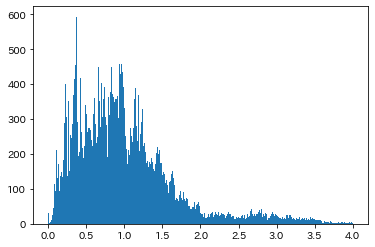

In [63]:
plt.hist(z_list, range=(0, 4), bins=400)
plt.xlabel('z')
plt.ylabel('count')
plt.show()